In [73]:

import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display


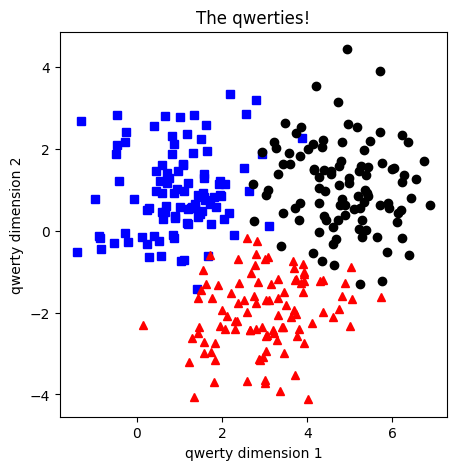

In [74]:

nPerClust = 100
blur =1


A = [1,1]
B = [5,1]
C = [3,-2]

a = [ A[0] + np.random.randn(nPerClust)*blur ,A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur ,B[1] + np.random.randn(nPerClust)*blur]
c = [ C[0] + np.random.randn(nPerClust)*blur ,C[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

data_np =np.hstack((a,b,c)).T

data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())
fig =plt.figure(figsize=(5,5))

plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels ==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels ==1)[0],1],'ko')
plt.plot(data[np.where(labels == 2)[0],0],data[np.where(labels ==2)[0],1],'r^')


plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [75]:

ANNq = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Softmax(dim=1)
)

lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)


yHat = ANNq(data)

print(data.shape)
print(yHat.shape)


torch.Size([300, 2])
torch.Size([300, 3])


In [76]:

numepochs = 100000
losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):
    
    yHat = ANNq(data)
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    ## 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ## 计算正确率 
    matches = torch.argmax(yHat,axis =1) == labels
    mathesNumeric = matches.float()
    
    accuracyPct  = 100 * torch.mean(mathesNumeric)
    ongoingAcc.append(accuracyPct)


predictions = ANNq(data)

predlables = torch.argmax(predictions,axis= 1)

totalacc = 100 * torch.mean((predlables == labels).float())


Final accurcy :97.6667%


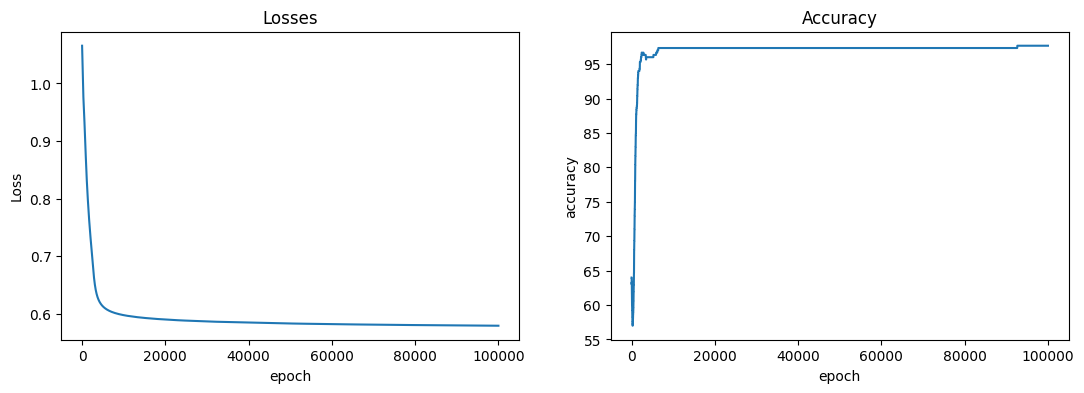

In [77]:

print('Final accurcy :%g%%'%totalacc)


fig,ax = plt.subplots(1,2,figsize =(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()







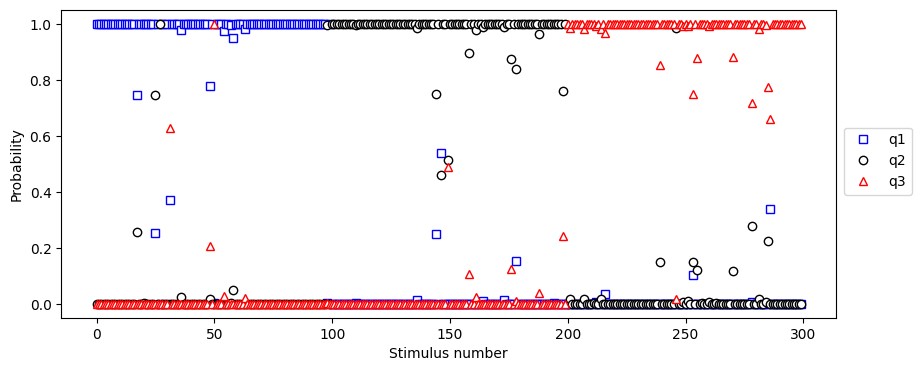

In [78]:


fig = plt.figure(figsize=(10,4))

colorshape = ['bs','ko','r^']

for i in range(3):
    
    plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor ='w')


plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['q1','q2','q3'],loc=(1.01,.4))

plt.show()
